2.1.0


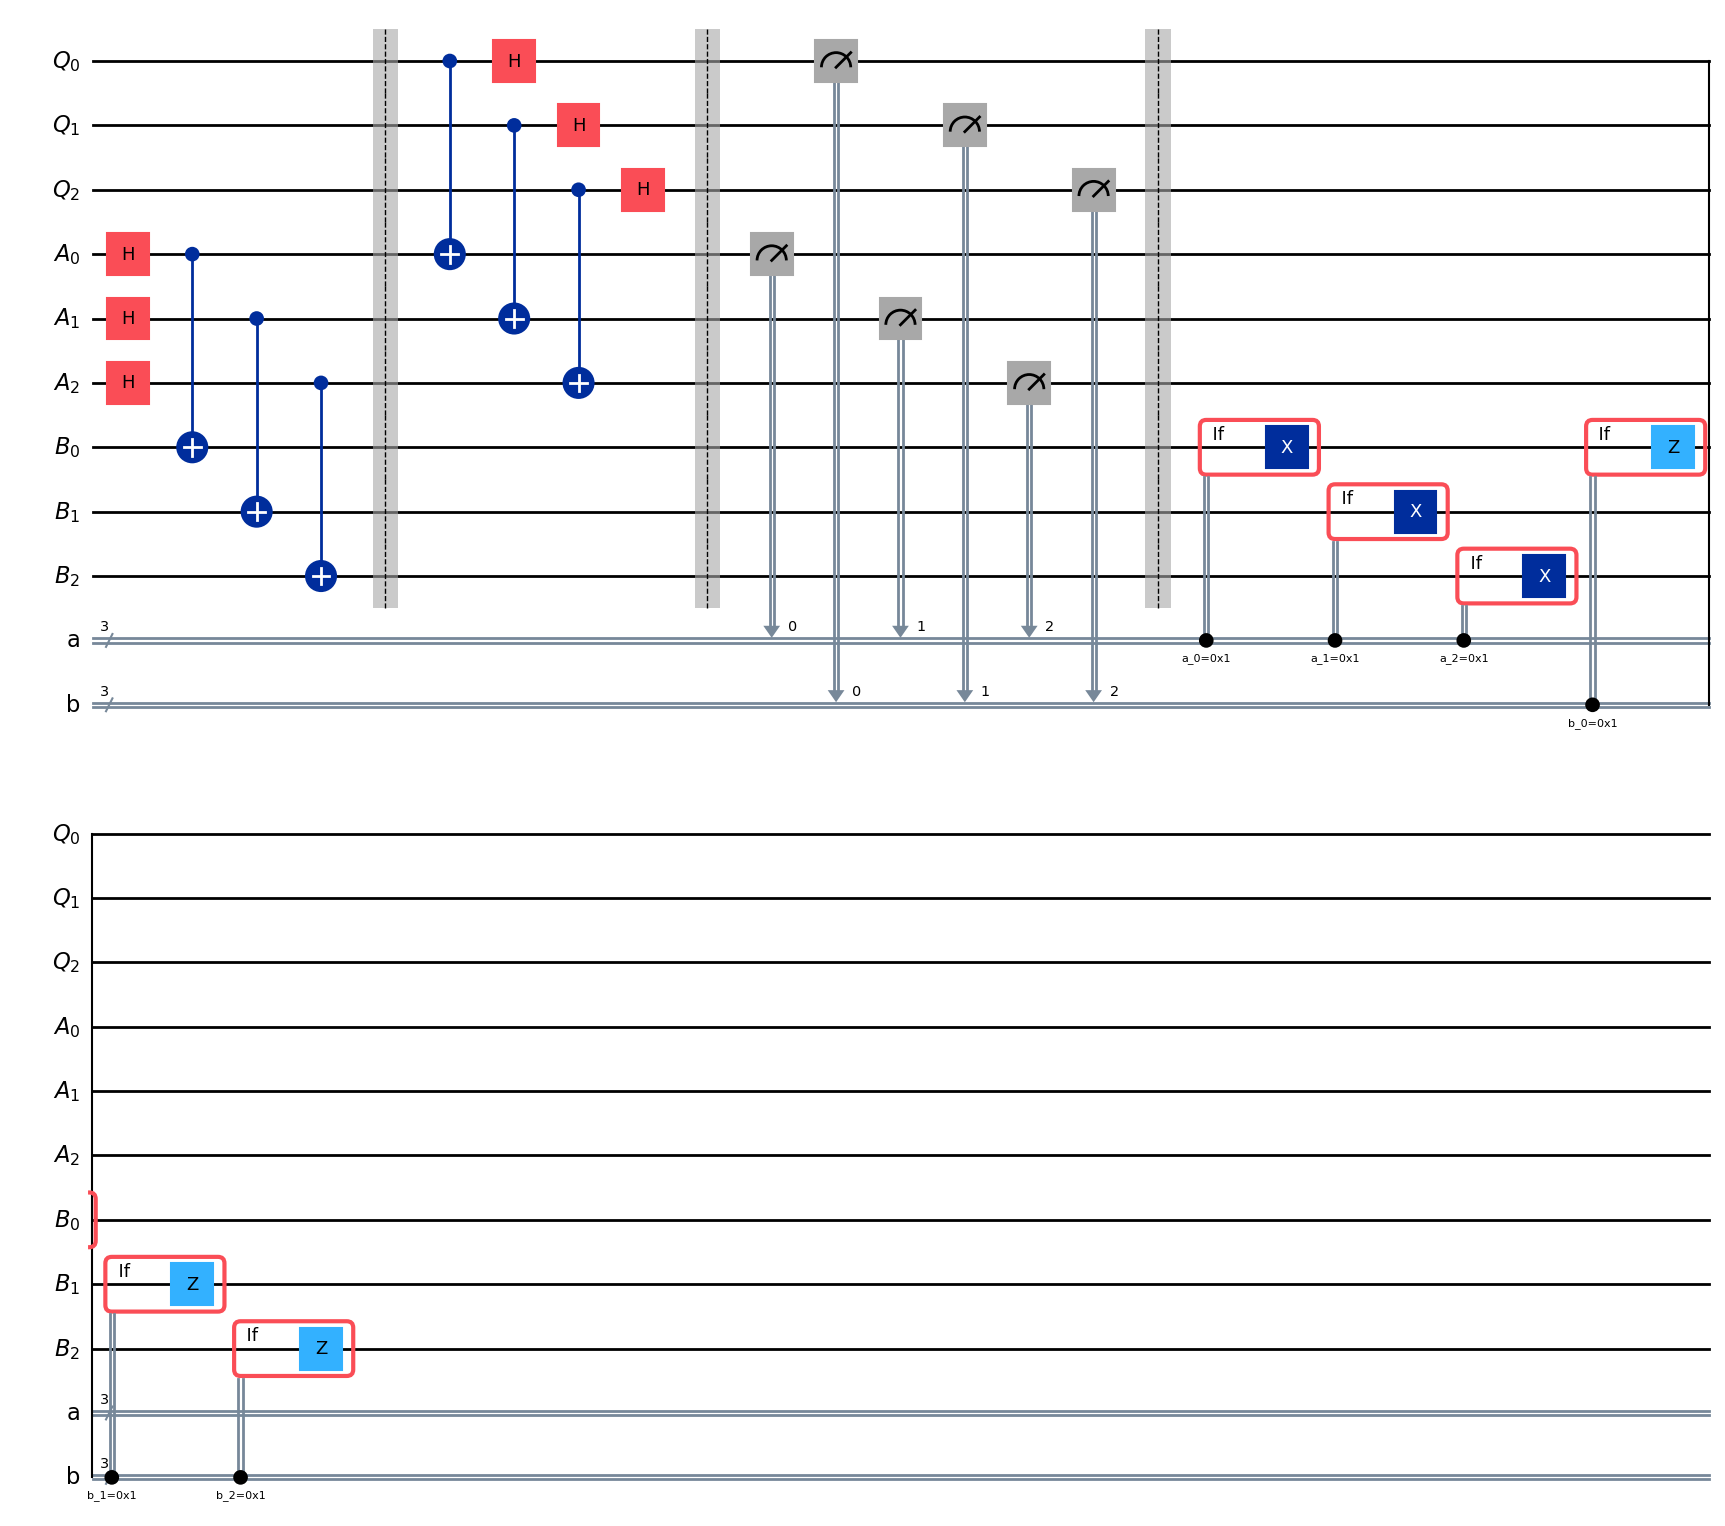

<IPython.core.display.Latex object>

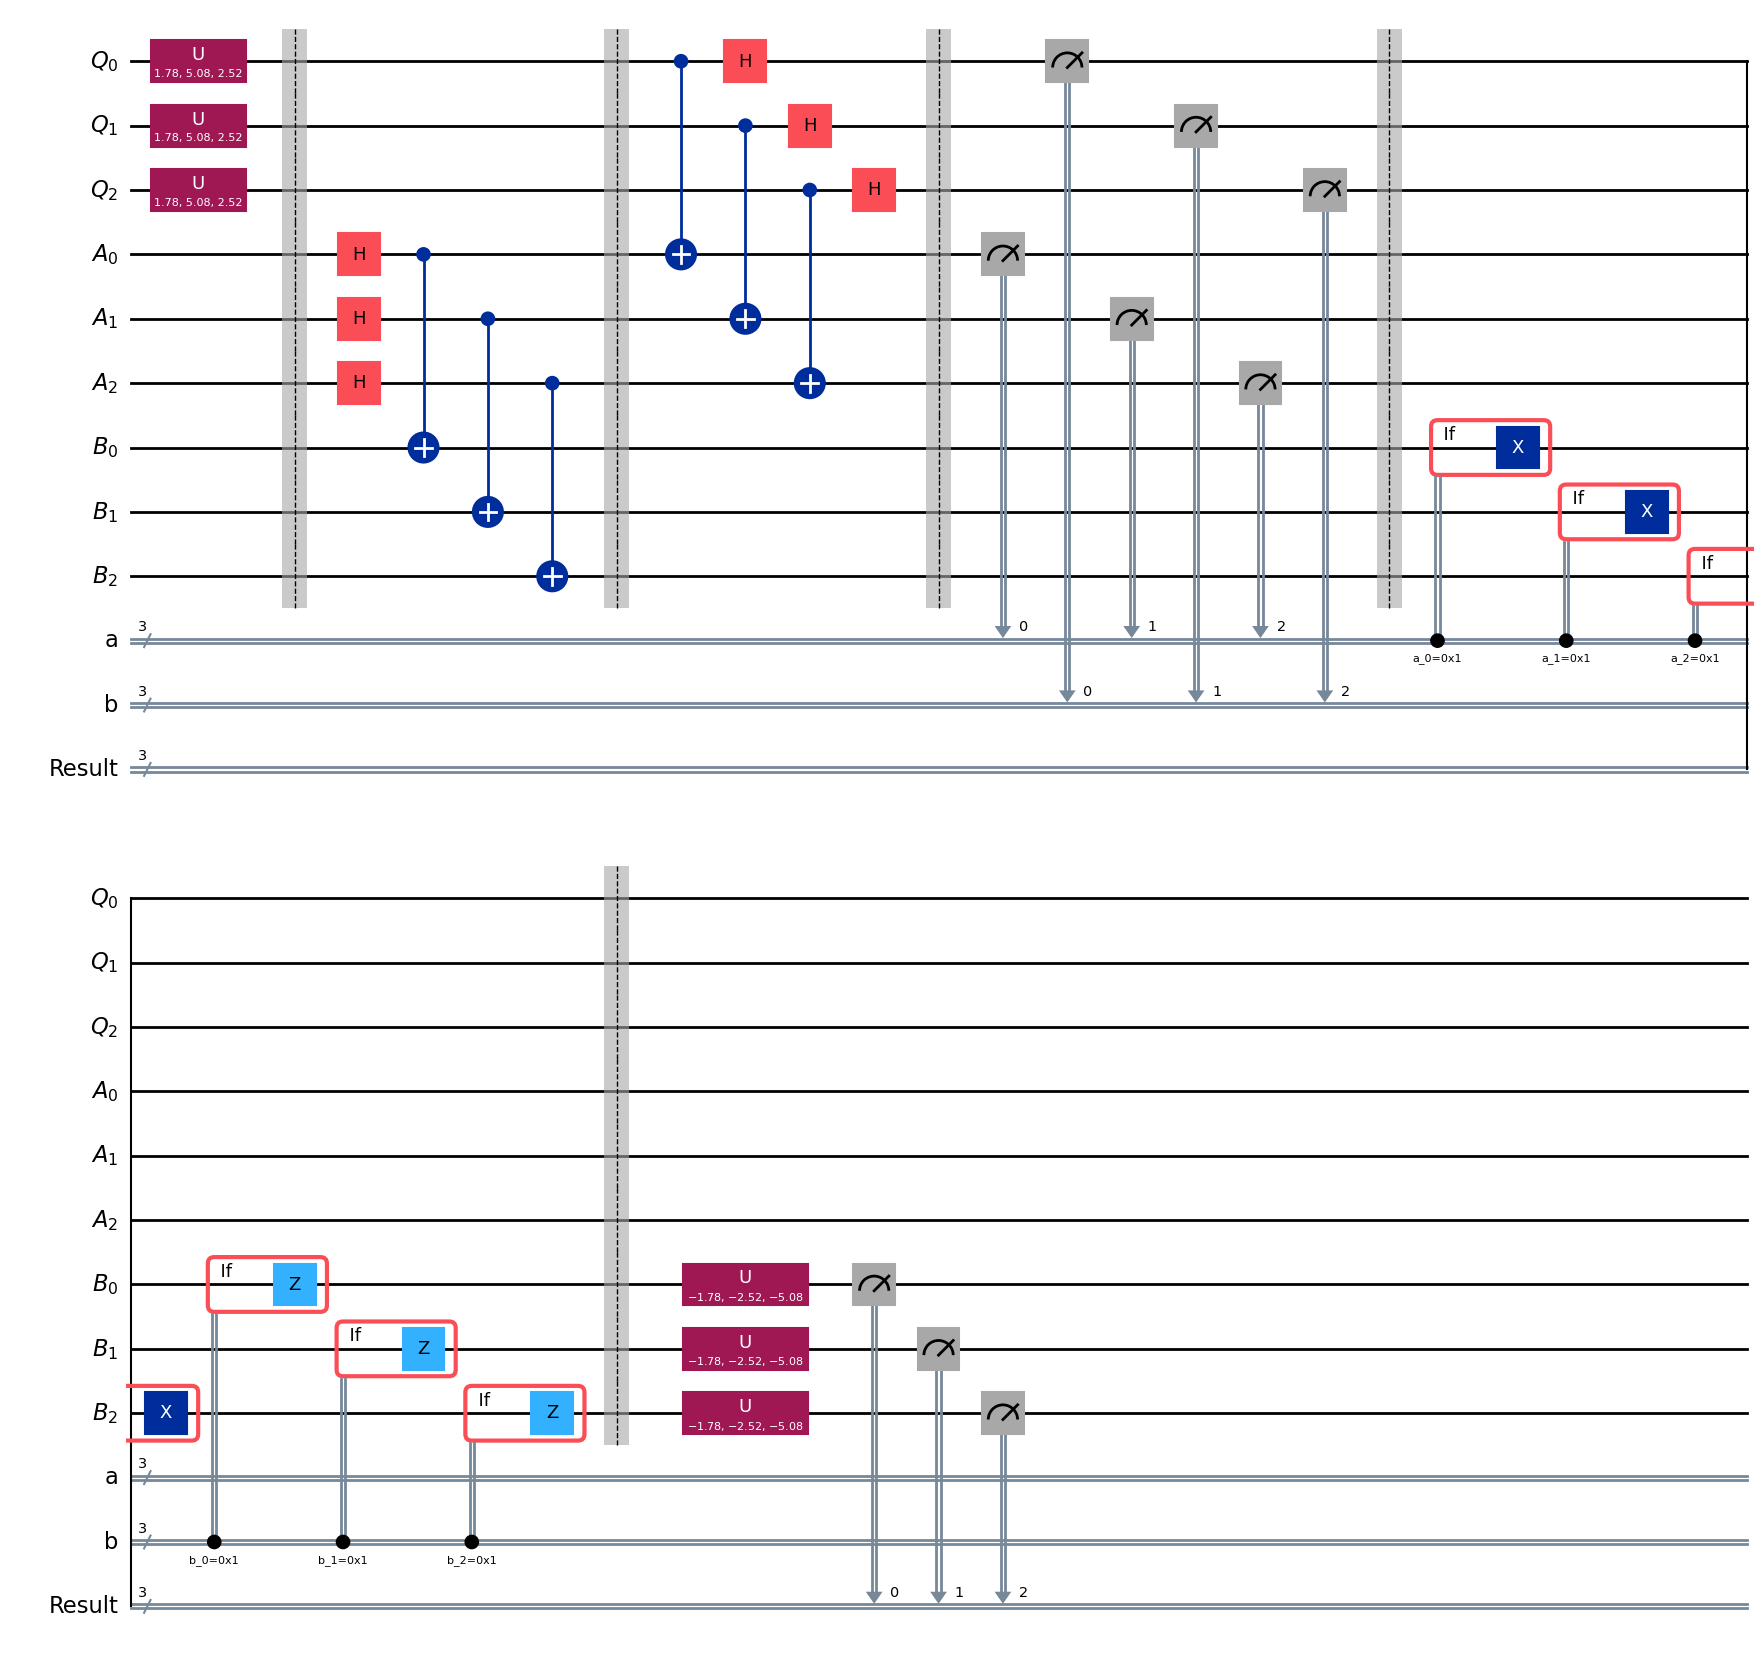

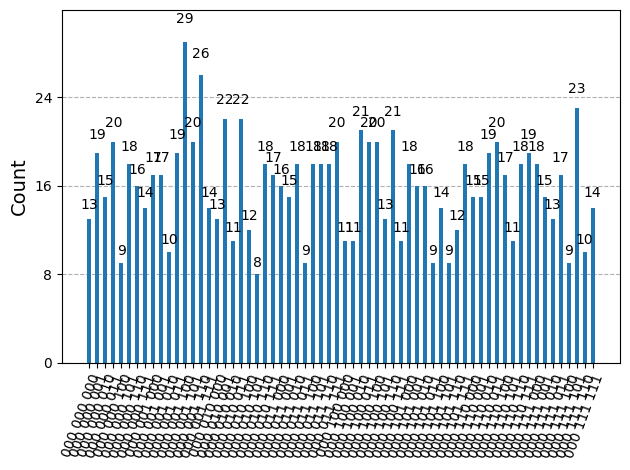

In [ ]:
from qiskit import __version__
print(__version__)

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

n = 3  # liczba qubitów


qubit = QuantumRegister(n, "Q")
ebit0 = QuantumRegister(n, "A")
ebit1 = QuantumRegister(n, "B")
a = ClassicalRegister(n, "a")
b = ClassicalRegister(n, "b")
result = ClassicalRegister(n, "Result")  # wynikowy pomiar po odtworzeniu


protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Przygotowanie splątanych par Bella
for i in range(n):
    protocol.h(ebit0[i])
    protocol.cx(ebit0[i], ebit1[i])
protocol.barrier()

# Operacje Alicji
for i in range(n):
    protocol.cx(qubit[i], ebit0[i])
    protocol.h(qubit[i])
protocol.barrier()

# Pomiary Alicji
for i in range(n):
    protocol.measure(ebit0[i], a[i])
    protocol.measure(qubit[i], b[i])
protocol.barrier()

# Operacje Boba
for i in range(n):
    with protocol.if_test((a[i], 1)):
        protocol.x(ebit1[i])
    with protocol.if_test((b[i], 1)):
        protocol.z(ebit1[i])

display(protocol.draw(output="mpl"))

random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi
)

display(array_to_latex(random_gate.to_matrix()))


test = QuantumCircuit(qubit, ebit0, ebit1, a, b, result)

for i in range(n):
    test.append(random_gate, [qubit[i]])
test.barrier()


test = test.compose(protocol)
test.barrier()

# Odtwarzanie stanu i pomiar końcowy
for i in range(n):
    test.append(random_gate.inverse(), [ebit1[i]])
    test.measure(ebit1[i], result[i])

display(test.draw(output="mpl"))


sim = AerSimulator()
compiled = sim.run(test).result()
counts = compiled.get_counts()

display(plot_histogram(counts))


result_start = 2 * n
filtered_statistics = marginal_distribution(counts, list(range(result_start, result_start + n)))

#display(plot_histogram(filtered_statistics))

